In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

# Specify the file paths for your CSV files
file_paths = [
    '/content/501.csv',
    '/content/502.csv',
    '/content/503.csv',
    '/content/504.csv',
    '/content/505.csv',
    '/content/506.csv',
    '/content/507.csv',
    '/content/508.csv',
    '/content/509.csv',
    '/content/510.csv',
    '/content/511.csv',
    '/content/512.csv',
    '/content/513.csv',
    '/content/514.csv'


]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

for file in file_paths:
    df = pd.read_csv(file)
    data = pd.concat([data, df], ignore_index=True)

# Save the merged DataFrame to a new CSV file
output_path = '/content/train.csv'
data.to_csv(output_path, index=False)

# Display the path to the merged CSV file
print("Merged CSV file saved at:", output_path)

Merged CSV file saved at: /content/train.csv


In [2]:
# Define label mapping
combined_data=pd.read_csv("/content/train.csv")
label_mapping = {1: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6}

# Convert 'label' column using label mapping
combined_data['label'] = combined_data['label'].map(label_mapping)

# Define label mapping
test_data=pd.read_csv('/content/515.csv')
label_mapping = {1: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6}

# Convert 'label' column using label mapping
test_data['label'] = test_data['label'].map(label_mapping)

Epoch 1/10
47224/47224 [==============================] - 140s 3ms/step - loss: 0.4060 - accuracy: 0.8578 - val_loss: 0.2788 - val_accuracy: 0.9100
Epoch 2/10
47224/47224 [==============================] - 137s 3ms/step - loss: 0.3358 - accuracy: 0.8888 - val_loss: 0.3026 - val_accuracy: 0.8985
Epoch 3/10
47224/47224 [==============================] - 136s 3ms/step - loss: 0.3136 - accuracy: 0.8963 - val_loss: 0.2757 - val_accuracy: 0.9082
Epoch 4/10
47224/47224 [==============================] - 139s 3ms/step - loss: 0.2999 - accuracy: 0.9023 - val_loss: 0.2934 - val_accuracy: 0.8927
Epoch 5/10
47224/47224 [==============================] - 138s 3ms/step - loss: 0.2911 - accuracy: 0.9058 - val_loss: 0.2855 - val_accuracy: 0.9046
Epoch 6/10
47224/47224 [==============================] - 139s 3ms/step - loss: 0.2854 - accuracy: 0.9080 - val_loss: 0.2887 - val_accuracy: 0.8982
Epoch 7/10
47224/47224 [==============================] - 140s 3ms/step - loss: 0.2815 - accuracy: 0.9098 - val_

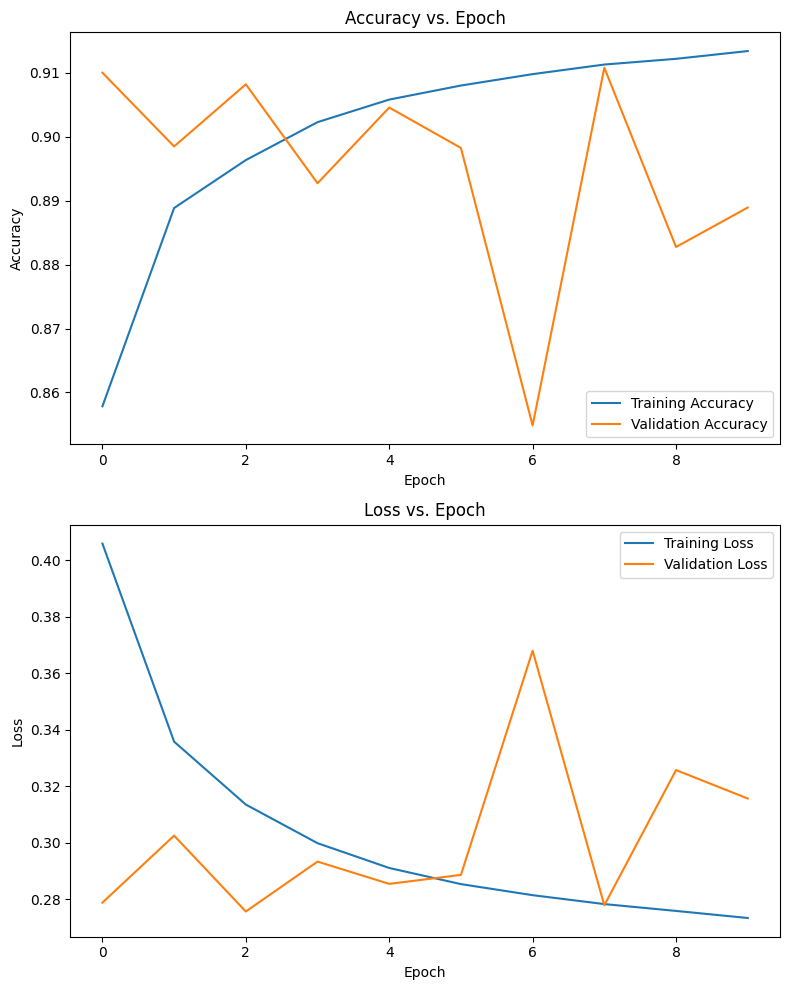

In [3]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

# Separate features and labels for training data
X_train = combined_data.drop(['label','timestamp'], axis=1)
y_train = combined_data['label']

# Use stratified k-fold split for training data
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, _ in stratified_kfold.split(X_train, y_train):
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    break  # Use the first fold only for simplicity

# Separate features and labels for test data
X_test = test_data.drop(['label','timestamp'], axis=1)
y_test = test_data['label']

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fold)
X_test_scaled = scaler.transform(X_test)

# Ensure labels are within the valid range [0, 6]
y_train_fold = y_train_fold.clip(0, 6)
y_test = y_test.clip(0, 6)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_scaled, y_train_fold, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate on test data
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)

# Evaluate accuracy
test_acc = accuracy_score(y_test, y_pred_classes)
print(f'Test accuracy: {test_acc}')

# Confusion Matrix for Training Data
y_train_pred = model.predict(X_train_scaled)
y_train_pred_classes = y_train_pred.argmax(axis=1)
conf_matrix_train = confusion_matrix(y_train_fold, y_train_pred_classes)


# Plotting accuracy vs epoch and loss vs epoch
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plotting accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy vs. Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plotting loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss vs. Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [4]:
# Save the trained model to an HDF5 file
model.save('saved_model.h5')
saved_model = tf.keras.models.load_model('saved_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# import tensorflow_model_optimization as tfmot

# # Load your trained TensorFlow model
# saved_model = tf.keras.models.load_model('saved_model.h5')

# # Define pruning parameters
# pruning_params = {
#     'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
#                                                               final_sparsity=0.90,
#                                                               begin_step=0,
#                                                               end_step=1000)
# }

# # Apply pruning to the model
# pruned_model = tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)

# # Define the loss function and metrics
# loss_function = 'sparse_categorical_crossentropy'
# metrics = ['accuracy']

# # Compile the model with the specified loss function and metrics
# pruned_model.compile(optimizer='SGD', loss=loss_function, metrics=metrics)

# # Save the pruned model
# pruned_model.save('pruned_model.h5')


In [14]:
# Assuming X_test_scaled contains preprocessed test data and is in the correct format

# Define a function to generate batches of representative test data
def test_data_generator():
    for sample in X_test_scaled:
        yield sample

# Create a TensorFlow Dataset from the data generator
test_batches = tf.data.Dataset.from_generator(test_data_generator, output_types=tf.float32)




In [16]:
import tensorflow as tf

# Assuming test_batches is defined earlier as a TensorFlow Dataset or data generator
# Modify this function to yield representative samples from your test data
def representative_data_gen():
    for input_sample in test_batches.take(100):
        yield [input_sample]

# Convert the pruned model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(saved_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Set the representative dataset
converter.representative_dataset = representative_data_gen

# Set the target specification for integer quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Convert the model to TensorFlow Lite
tflite_model = converter.convert()

# Save the pruned TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [ ]:
# import tensorflow_model_optimization as tfmot

# # Apply pruning to the model
# pruned_model = tfmot.sparsity.keras.prune_low_magnitude(saved_model)


In [6]:
import pathlib
model_file = pathlib.Path('model.tflite')

In [18]:
print(model_file.write_bytes(tflite_model))

2888


In [19]:
import os

# Specify the path to your TensorFlow Lite model file
model_file_path = 'model.tflite'  # Replace 'model.tflite' with the path to your model file

# Get the size of the model file
model_file_size = os.path.getsize(model_file_path)

# Print the size of the model file in bytes
print("Size of the TensorFlow Lite model file:", model_file_size, "bytes")


Size of the TensorFlow Lite model file: 2888 bytes


In [8]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_content = tflite_model  )
# interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([1, 6], dtype=int32), 'shape_signature': array([-1,  6], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 7, 'shape': array([1, 7], dtype=int32), 'shape_signature': array([-1,  7], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [9]:

to_predict = np.array([[-0.980225, -0.079346, 0.140625, -0.961182, -0.121582, -0.051758]], dtype=np.float32)
to_predict_scaled = scaler.transform(to_predict)
interpreter.set_tensor(input_details[0]['index'], to_predict_scaled)
interpreter.invoke()
output = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output)
print("Predicted Class:", predicted_class)


Predicted Class: 4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
#expected o/p 4

import pandas as pd

# Manually provide input values
manual_input_values = {
     'back_x': [-0.980225],
    'back_y': [-0.079346],
    'back_z': [0.140625],
    'thigh_x': [-0.961182],
    'thigh_y': [-0.121582],
    'thigh_z': [-0.051758]
}

# Create a DataFrame with the manual input values
manual_input_df = pd.DataFrame(manual_input_values)

# Scaling features for the manual input data using the same scaler
manual_input_scaled = scaler.transform(manual_input_df)

# Make predictions using the trained model
manual_predictions = model.predict(manual_input_scaled)

# Get the predicted classes
manual_pred_classes = manual_predictions.argmax(axis=1)

# Display the manual input and predicted classes
print("Manual Input:")
print(manual_input_df)
print("\nPredicted Classes for Manual Input:")
print(manual_pred_classes)

1/1 [==============================] - 0s 58ms/step
Manual Input:
     back_x    back_y    back_z   thigh_x   thigh_y   thigh_z
0 -0.980225 -0.079346  0.140625 -0.961182 -0.121582 -0.051758

Predicted Classes for Manual Input:
[4]


In [33]:
tflite_model

b'\x1c\x00\x00\x00TFL3\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x80\x00\x00\x00\xd8\x00\x00\x00\x14\x04\x00\x00$\x04\x00\x00\xac\n\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\x9a\xfb\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x9c\xff\xff\xff\t\x00\x00\x00\x04\x00\x00\x00\x07\x00\x00\x00dense_1\x00\x01\x00\x00\x00\x04\x00\x00\x00\xa2\xfb\xff\xff\x04\x00\x00\x00\x07\x00\x00\x00input_1\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x0c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x0b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\r\x00\x00\x008\x03\x00\x000\x03\x00\x00\x04\x03\x00\x00\x14\x02\x00\x00\x84\x01\x00\x00\xb4\x00\x00\x00\xac\x00\x00\x00\xa4\x00\x00\x00\x9c\x00\x00\x00\x94\x00\x00\x00\x8c\x00\x00\x00l\x00\x00\x00\x04\x

In [26]:
!pip install tensorflow_model_optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 4.8 MB/s eta 0:00:00


In [34]:
# Load the saved TensorFlow Lite model
with open('model.tflite', 'rb') as f:
    tflite_model_content = f.read()

# Write the TensorFlow Lite model content to a C header file
header_file_path = '/content/model_data.h'

with open(header_file_path, 'w') as header_file:
    header_file.write("#ifndef MODEL_DATA_H\n")
    header_file.write("#define MODEL_DATA_H\n\n")

    header_file.write("const unsigned char model_data[] = {\n")
    for byte in tflite_model_content:
        header_file.write(f"0x{byte:02X}, ")
    header_file.write("\n};\n\n")

    header_file.write("#endif  // MODEL_DATA_H\n")

print("C header file generated:", header_file_path)

C header file generated: /content/model_data.h
